In [293]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


# Importing Train DF

In [294]:
#Configuring dataset view option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [295]:
#Reading data 
trdf = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
tsdf = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
#Combining test and train to gain time in data engineering
fulldf = pd.concat([trdf,tsdf], ignore_index=True, sort = False )

In [296]:
#Checking overall result and DF Shape
print('Train Shape ', trdf.shape)
print('Test Shape ', tsdf.shape)
print('All data Shape ', fulldf.shape)

Train Shape  (1460, 81)
Test Shape  (1459, 80)
All data Shape  (2919, 81)


In [297]:
fulldf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [298]:
#Dropping ID Column
#Dropping in Fulldata
fulldf.drop(['Id'],axis=1, inplace=True)
#Dropping in Train data
trdf.drop(['Id'],axis=1, inplace=True)
#Dropping in Train data
tsdf.drop(['Id'],axis=1, inplace=True)


# Checking DF overall shape

In [299]:
#Checking data tipe of FULL variables
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [300]:
#Checking statistical information of FULL data
describe1df=trdf.describe().T
trdf.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


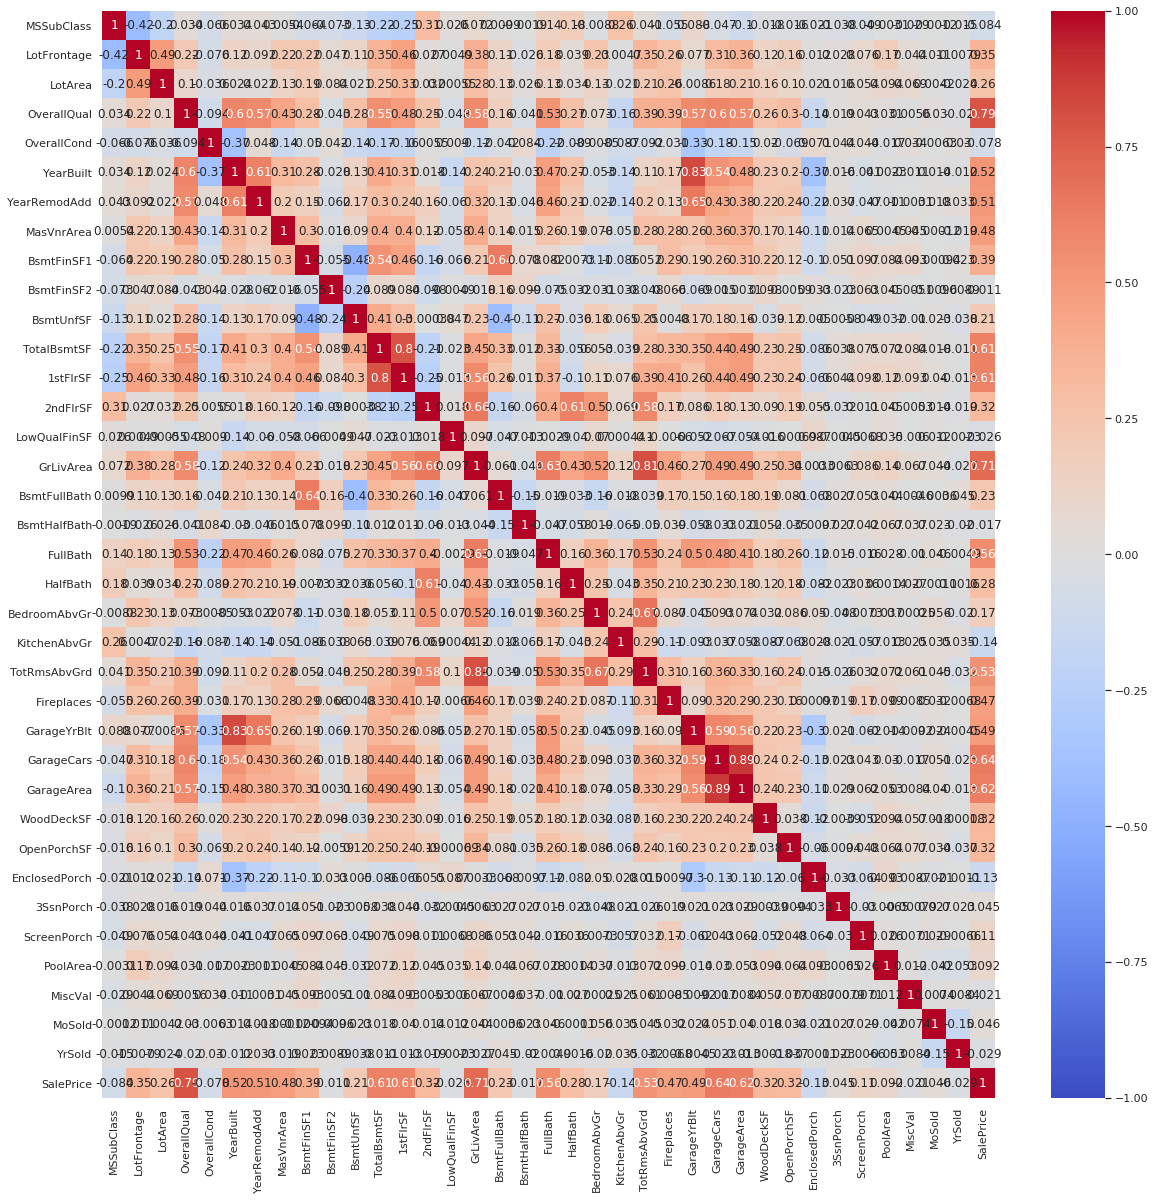

In [301]:
#Understandinng Correlation for ALL data(mind the NaN in sales prices)
plt.figure(figsize=(20,20))
sns.heatmap(fulldf.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

* We can see some of the features has high correlation and maybe can be combined latter

In [302]:
#Checking Group formation and distribution (This worths better for categorical data) of FULL data
column = fulldf.columns
for i in column:
    print('***** ',i, '\n')
    print(fulldf[i].value_counts(),'\n')


*****  MSSubClass 

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64 

*****  MSZoning 

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64 

*****  LotFrontage 

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64 

*****  LotArea 

9600     44
7200     43
6000     34
9000     29
10800    25
         ..
12867     1
2628      1
8775      1
13478     1
12292     1
Name: LotArea, Length: 1951, dtype: int64 

*****  Street 

Pave    2907
Grvl      12
Name: Street, dtype: int64 

*****  Alley 

Grvl    120
Pave     78
Name: Alley, dtype: int64 

*****  LotShape 

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dt

* Now we've got a clear knowledge about which data seems numerical(quantitative) and categorical(qualitative)

In [303]:
#Checking NaN values on FULL data
miss_sum = pd.DataFrame(trdf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((trdf.isnull().sum()/trdf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent], axis=1)
print(missfulldf[missfulldf['Total']>0])
print('\n********TOTALS**********\n',missfulldf[missfulldf['Total']>0].count())

              Total  Percentage
PoolQC         2909   99.657417
MiscFeature    2814   96.402878
Alley          2721   93.216855
Fence          2348   80.438506
SalePrice      1459   49.982871
FireplaceQu    1420   48.646797
LotFrontage     486   16.649538
GarageCond      159    5.447071
GarageYrBlt     159    5.447071
GarageQual      159    5.447071
GarageFinish    159    5.447071
GarageType      157    5.378554
BsmtCond         82    2.809181
BsmtExposure     82    2.809181
BsmtQual         81    2.774923
BsmtFinType2     80    2.740665
BsmtFinType1     79    2.706406
MasVnrType       24    0.822199
MasVnrArea       23    0.787941
MSZoning          4    0.137033
Utilities         2    0.068517
Functional        2    0.068517
BsmtFullBath      2    0.068517
BsmtHalfBath      2    0.068517
GarageCars        1    0.034258
BsmtFinSF2        1    0.034258
Exterior2nd       1    0.034258
GarageArea        1    0.034258
TotalBsmtSF       1    0.034258
BsmtUnfSF         1    0.034258
BsmtFinS

In [304]:
#Checking NaN values on TRAIN data
miss_sum = pd.DataFrame(trdf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((trdf.isnull().sum()/trdf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent], axis=1)
print(missfulldf[missfulldf['Total']>0])
print('\n********TOTALS**********\n',missfulldf[missfulldf['Total']>0].count())

              Total  Percentage
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageType       81    5.547945
GarageCond       81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
GarageYrBlt      81    5.547945
BsmtFinType2     38    2.602740
BsmtExposure     38    2.602740
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtFinType1     37    2.534247
MasVnrArea        8    0.547945
MasVnrType        8    0.547945
Electrical        1    0.068493

********TOTALS**********
 Total         19
Percentage    19
dtype: int64


* Every variable with more than 45% NaN is dispendable for our work hence we can drop the following columns:

*               Total  Percentage
1. PoolQC         2909   99.657417
2. MiscFeature    2814   96.402878
3. Alley          2721   93.216855
4. Fence          2348   80.438506
5. Fence    1420   48.646797

In [305]:
#Dropping high missing rate columns
#Dropping in FULL df
fulldf.drop(['PoolQC','Alley','MiscFeature','Fence','FireplaceQu'], axis=1,inplace=True)
#Dropping in TRAIN df
trdf.drop(['PoolQC','Alley','MiscFeature','Fence','FireplaceQu'], axis=1,inplace=True)
#Dropping in TEST df
tsdf.drop(['PoolQC','Alley','MiscFeature','Fence','FireplaceQu'], axis=1,inplace=True)

#Checking NaN values on FULL data
miss_sum = pd.DataFrame(fulldf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((fulldf.isnull().sum()/fulldf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent], axis=1)
print(missfulldf[missfulldf['Total']>0])
print('\n********TOTALS**********\n',missfulldf[missfulldf['Total']>0].count())

              Total  Percentage
SalePrice      1459   49.982871
LotFrontage     486   16.649538
GarageCond      159    5.447071
GarageYrBlt     159    5.447071
GarageFinish    159    5.447071
GarageQual      159    5.447071
GarageType      157    5.378554
BsmtCond         82    2.809181
BsmtExposure     82    2.809181
BsmtQual         81    2.774923
BsmtFinType2     80    2.740665
BsmtFinType1     79    2.706406
MasVnrType       24    0.822199
MasVnrArea       23    0.787941
MSZoning          4    0.137033
Utilities         2    0.068517
Functional        2    0.068517
BsmtFullBath      2    0.068517
BsmtHalfBath      2    0.068517
BsmtFinSF1        1    0.034258
BsmtFinSF2        1    0.034258
Exterior2nd       1    0.034258
GarageArea        1    0.034258
TotalBsmtSF       1    0.034258
BsmtUnfSF         1    0.034258
Electrical        1    0.034258
Exterior1st       1    0.034258
KitchenQual       1    0.034258
SaleType          1    0.034258
GarageCars        1    0.034258

*******

In [306]:
#Checking 0 values on FULL data
zeros_sum = pd.DataFrame(fulldf[(fulldf==0)].count().sort_values(ascending=False), columns = ['Total'])
zeros_percent = pd.DataFrame((fulldf[(fulldf==0)].count()/fulldf.isnull().count()*100), columns = ['Percentage'])
zerosfulldf = pd.concat([zeros_sum,zeros_percent], axis=1)
print(zerosfulldf[zerosfulldf['Total']>0])
print('\n********TOTALS**********\n',zerosfulldf[zerosfulldf['Total']>0].count())

               Total  Percentage
PoolArea        2906   99.554642
3SsnPorch       2882   98.732443
LowQualFinSF    2879   98.629668
MiscVal         2816   96.471394
BsmtHalfBath    2742   93.936280
ScreenPorch     2663   91.229873
BsmtFinSF2      2571   88.078109
EnclosedPorch   2460   84.275437
HalfBath        1834   62.829736
MasVnrArea      1738   59.540939
BsmtFullBath    1705   58.410415
2ndFlrSF        1668   57.142857
WoodDeckSF      1523   52.175403
Fireplaces      1420   48.646797
OpenPorchSF     1298   44.467283
BsmtFinSF1       929   31.825968
BsmtUnfSF        241    8.256252
GarageArea       157    5.378554
GarageCars       157    5.378554
TotalBsmtSF       78    2.672148
FullBath          12    0.411100
BedroomAbvGr       8    0.274066
KitchenAbvGr       3    0.102775

********TOTALS**********
 Total         23
Percentage    23
dtype: int64


In [307]:
#Dropping high Zeros rate columns
#Dropping in FULL df
fulldf.drop(['PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch','BsmtFinSF2','EnclosedPorch'\
             ,'HalfBath','MasVnrArea','BsmtFullBath','2ndFlrSF','WoodDeckSF','Fireplaces'], axis=1,inplace=True)
#Dropping in TRAIN df
trdf.drop(['PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch','BsmtFinSF2','EnclosedPorch'\
             ,'HalfBath','MasVnrArea','BsmtFullBath','2ndFlrSF','WoodDeckSF','Fireplaces'], axis=1,inplace=True)
#Dropping in TEST df
tsdf.drop(['PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch','BsmtFinSF2','EnclosedPorch'\
             ,'HalfBath','MasVnrArea','BsmtFullBath','2ndFlrSF','WoodDeckSF','Fireplaces'], axis=1,inplace=True)

#Checking 0 values on FULL data
zeros_sum = pd.DataFrame(fulldf[(fulldf==0)].count().sort_values(ascending=False), columns = ['Total'])
zeros_percent = pd.DataFrame((fulldf[(fulldf==0)].count()/fulldf.isnull().count()*100), columns = ['Percentage'])
zerosfulldf = pd.concat([zeros_sum,zeros_percent], axis=1)
print(zerosfulldf[zerosfulldf['Total']>0])
print('\n********TOTALS**********\n',zerosfulldf[zerosfulldf['Total']>0].count())

              Total  Percentage
OpenPorchSF    1298   44.467283
BsmtFinSF1      929   31.825968
BsmtUnfSF       241    8.256252
GarageCars      157    5.378554
GarageArea      157    5.378554
TotalBsmtSF      78    2.672148
FullBath         12    0.411100
BedroomAbvGr      8    0.274066
KitchenAbvGr      3    0.102775

********TOTALS**********
 Total         9
Percentage    9
dtype: int64


# Adjusting Data Types
Before doinng the data cleasing we need to define properly the data type of each veriable

In [308]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [309]:
#Converting Category(Qualitative) data

#Converting on FULL df
fulldf = fulldf.astype({'MSSubClass': 'category', 'MSZoning': 'category', 'Street': 'category', 'LotShape': 'category',\
                   'LandContour': 'category', 'Neighborhood': 'category', 'LandSlope': 'category', 'LotConfig': 'category', \
                   'Utilities': 'category', 'Condition1': 'category', 'Condition2': 'category', 'BldgType': 'category', \
                   'OverallQual': 'category', 'RoofStyle': 'category', 'RoofMatl': 'category', 'Exterior2nd': 'category', \
                   'MasVnrType': 'category', 'ExterQual': 'category', 'ExterCond': 'category', 'Foundation': 'category', \
                   'BsmtQual': 'category', 'BsmtCond': 'category', 'BsmtExposure': 'category', 'BsmtFinType1': 'category',\
                   'BsmtFinType2': 'category', 'Heating': 'category', 'HeatingQC': 'category', 'CentralAir': 'category', \
                   'Electrical': 'category', 'KitchenQual': 'category', 'Functional': 'category', 'GarageType': 'category',\
                   'GarageFinish': 'category', 'GarageCond': 'category', 'PavedDrive': 'category', 'SaleType': 'category', \
                   'Exterior1st': 'category', 'SaleCondition': 'category', 'HouseStyle': 'category', 'OverallCond': 'category',\
                        'KitchenAbvGr': 'category','GarageQual': 'category'})

#Converting on TRAIN df
trdf = trdf.astype({'MSSubClass': 'category', 'MSZoning': 'category', 'Street': 'category', 'LotShape': 'category',\
                   'LandContour': 'category', 'Neighborhood': 'category', 'LandSlope': 'category', 'LotConfig': 'category', \
                   'Utilities': 'category', 'Condition1': 'category', 'Condition2': 'category', 'BldgType': 'category', \
                   'OverallQual': 'category', 'RoofStyle': 'category', 'RoofMatl': 'category', 'Exterior2nd': 'category', \
                   'MasVnrType': 'category', 'ExterQual': 'category', 'ExterCond': 'category', 'Foundation': 'category', \
                   'BsmtQual': 'category', 'BsmtCond': 'category', 'BsmtExposure': 'category', 'BsmtFinType1': 'category',\
                   'BsmtFinType2': 'category', 'Heating': 'category', 'HeatingQC': 'category', 'CentralAir': 'category', \
                   'Electrical': 'category', 'KitchenQual': 'category', 'Functional': 'category', 'GarageType': 'category',\
                   'GarageFinish': 'category', 'GarageCond': 'category', 'PavedDrive': 'category', 'SaleType': 'category', \
                   'Exterior1st': 'category', 'SaleCondition': 'category', 'HouseStyle': 'category', 'OverallCond': 'category',\
                    'KitchenAbvGr': 'category','GarageQual': 'category'})

#Converting on TEST df
tsdf = tsdf.astype({'MSSubClass': 'category', 'MSZoning': 'category', 'Street': 'category', 'LotShape': 'category',\
                   'LandContour': 'category', 'Neighborhood': 'category', 'LandSlope': 'category', 'LotConfig': 'category', \
                   'Utilities': 'category', 'Condition1': 'category', 'Condition2': 'category', 'BldgType': 'category', \
                   'OverallQual': 'category', 'RoofStyle': 'category', 'RoofMatl': 'category', 'Exterior2nd': 'category', \
                   'MasVnrType': 'category', 'ExterQual': 'category', 'ExterCond': 'category', 'Foundation': 'category', \
                   'BsmtQual': 'category', 'BsmtCond': 'category', 'BsmtExposure': 'category', 'BsmtFinType1': 'category',\
                   'BsmtFinType2': 'category', 'Heating': 'category', 'HeatingQC': 'category', 'CentralAir': 'category', \
                   'Electrical': 'category', 'KitchenQual': 'category', 'Functional': 'category', 'GarageType': 'category',\
                   'GarageFinish': 'category', 'GarageCond': 'category', 'PavedDrive': 'category', 'SaleType': 'category', \
                   'Exterior1st': 'category', 'SaleCondition': 'category', 'HouseStyle': 'category', 'OverallCond': 'category',\
                    'KitchenAbvGr': 'category','GarageQual': 'category'})

In [310]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   category
 1   MSZoning       2915 non-null   category
 2   LotFrontage    2433 non-null   float64 
 3   LotArea        2919 non-null   int64   
 4   Street         2919 non-null   category
 5   LotShape       2919 non-null   category
 6   LandContour    2919 non-null   category
 7   Utilities      2917 non-null   category
 8   LotConfig      2919 non-null   category
 9   LandSlope      2919 non-null   category
 10  Neighborhood   2919 non-null   category
 11  Condition1     2919 non-null   category
 12  Condition2     2919 non-null   category
 13  BldgType       2919 non-null   category
 14  HouseStyle     2919 non-null   category
 15  OverallQual    2919 non-null   category
 16  OverallCond    2919 non-null   category
 17  YearBuilt      2919 non-null   in

In [311]:
#Checking categorical data statistics of FULL data
fulldf.describe(include='category').T

,count,unique,top,freq
MSSubClass,2919,16,20,1079
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


In [312]:
#Checking categorical with more than 80% of the same category wich is dispendable for analisys
dfcatdescrb = fulldf.describe(include='category').T
freq_sum = pd.DataFrame(dfcatdescrb['freq'].sort_values(ascending=False)).rename(columns = {'freq':'Total'})
duplic_percent = pd.DataFrame(dfcatdescrb['freq']/fulldf.select_dtypes("category").count()*100).rename(columns = {0:'Percentage'})
duplic_full = pd.concat([freq_sum, duplic_percent], axis=1)
duplic_full
print(duplic_full[duplic_full['Percentage']>=80])
print('\n********TOTALS**********\n',duplic_full[duplic_full['Percentage']>=80].count())

              Total Percentage
Utilities      2916    99.9657
Street         2907    99.5889
Condition2     2889    98.9723
RoofMatl       2876    98.5269
Heating        2874    98.4584
KitchenAbvGr   2785    95.4094
LandSlope      2778    95.1696
CentralAir     2723    93.2854
Functional     2717    93.1436
Electrical     2671    91.5353
GarageCond     2654    96.1594
PavedDrive     2641    90.4762
LandContour    2622    89.8253
BsmtCond       2606    91.8576
GarageQual     2604    94.3478
ExterCond      2538    86.9476
SaleType       2525    86.5319
Condition1     2511    86.0226
BsmtFinType2   2493    87.8126
BldgType       2425    83.0764
SaleCondition  2402    82.2885

********TOTALS**********
 Total         21
Percentage    21
dtype: int64


* Therefore we can drop 19 variables which have more than 80% of the same valuem which will not help for our analisys.

In [313]:
#Dropping high duplicated rate columns
droplist = duplic_full[duplic_full['Percentage']>=80].index

#Dropping in FULL df
fulldf.drop(droplist, axis=1, inplace=True)
#Dropping in TRAIN df
trdf.drop(droplist, axis=1,inplace=True)
#Dropping in TEST df
tsdf.drop(droplist, axis=1,inplace=True)

#Checking categorical with more than 80% of the same category wich is dispendable for analisys
dfcatdescrb = fulldf.describe(include='category').T
freq_sum = pd.DataFrame(dfcatdescrb['freq'].sort_values(ascending=False)).rename(columns = {'freq':'Total'})
duplic_percent = pd.DataFrame(dfcatdescrb['freq']/fulldf.select_dtypes("category").count()*100).rename(columns = {0:'Percentage'})
duplic_full = pd.concat([freq_sum, duplic_percent], axis=1)
duplic_full
print(duplic_full[duplic_full['Percentage']>=80])
print('\n********TOTALS**********\n',duplic_full[duplic_full['Percentage']>=80].count())


Empty DataFrame
Columns: [Total, Percentage]
Index: []

********TOTALS**********
 Total         0
Percentage    0
dtype: int64


**Now that we have dropped all dispendable variables, let's check which data still have Zeroes and NaN to be filled**

In [314]:
#Checking the remaining cleasing to be done
print('****************************************************************************************************')
print('Remaining NaN Variables')
print('****************************************************************************************************\n')
#Checking NaN values on FULL data
dftype = pd.DataFrame(fulldf.dtypes, columns = ['DType'])
miss_sum = pd.DataFrame(fulldf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((fulldf.isnull().sum()/fulldf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent,dftype], axis=1)
print('--> NaN Category \n')
print(missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']=='category')])
print('\n********TOTALS**********\n',missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']=='category')].count())
print('\n --> NaN Numeric \n')
print(missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']!='category')])
print('\n********TOTALS**********\n',missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']!='category')].count())
print('\n \n****************************************************************************************************')
print('Remaining Zeros Variables')
print('****************************************************************************************************\n')
#Checking 0 values on FULL data
zeros_sum = pd.DataFrame(fulldf[(fulldf==0)].count().sort_values(ascending=False), columns = ['Total'])
zeros_percent = pd.DataFrame((fulldf[(fulldf==0)].count()/fulldf.isnull().count()*100), columns = ['Percentage'])
zerosfulldf = pd.concat([zeros_sum,zeros_percent,dftype], axis=1)
print('--> Zeros Category \n')
print(zerosfulldf[(zerosfulldf['Total']>0) & (zerosfulldf['DType']=='category')])
print('\n********TOTALS**********\n',zerosfulldf[(zerosfulldf['Total']>0) & (zerosfulldf['DType']=='category')].count())
print('\n --> Zeros Numeric \n')
print(zerosfulldf[(zerosfulldf['Total']>0) & (zerosfulldf['DType']!='category')])
print('\n********TOTALS**********\n',zerosfulldf[(zerosfulldf['Total']>0) & (zerosfulldf['DType']!='category')].count())


****************************************************************************************************
Remaining NaN Variables
****************************************************************************************************

--> NaN Category 

              Total  Percentage     DType
GarageFinish    159    5.447071  category
GarageType      157    5.378554  category
BsmtExposure     82    2.809181  category
BsmtQual         81    2.774923  category
BsmtFinType1     79    2.706406  category
MasVnrType       24    0.822199  category
MSZoning          4    0.137033  category
Exterior1st       1    0.034258  category
Exterior2nd       1    0.034258  category
KitchenQual       1    0.034258  category

********TOTALS**********
 Total         10
Percentage    10
DType         10
dtype: int64

 --> NaN Numeric 

             Total  Percentage    DType
SalePrice     1459   49.982871  float64
LotFrontage    486   16.649538  float64
GarageYrBlt    159    5.447071  float64
GarageCars       1   

# **Filling out NaN and Zeroes**

# Categorical Data

1. GarageFinish    159    5.447071  category
1. GarageType      157    5.378554  category
1. BsmtExposure     82    2.809181  category
1. BsmtQual         81    2.774923  category
1. BsmtFinType1     79    2.706406  category
1. MasVnrType       24    0.822199  category
1. MSZoning          4    0.137033  category
1. Exterior1st       1    0.034258  category
1. Exterior2nd       1    0.034258  category
1. KitchenQual       1    0.034258  category

There are some variables that NaN states for 'None', they are :

* GarageFinish
* GarageType
* BsmtExposure
* BsmtQual
* BsmtFinType1
* MasVnrType


In [315]:
nonelist = ['GarageFinish','GarageType',\
            'BsmtExposure','BsmtQual','BsmtFinType1','MasVnrType']
nonelistwithout_none = ['GarageFinish','GarageType',\
            'BsmtExposure','BsmtQual','BsmtFinType1']

#adding None Category to the variables
for colunaa in nonelistwithout_none:
    fulldf[colunaa] = fulldf[colunaa].cat.add_categories('None')
    trdf[colunaa] = trdf[colunaa].cat.add_categories('None')
    tsdf[colunaa] = tsdf[colunaa].cat.add_categories('None')

for coluna in nonelist:
    #Replacing in FULL df
    fulldf[coluna].fillna('None', inplace=True)
    #Replacing in TRAIN df
    trdf[coluna].fillna('None', inplace=True)
    #Replacing in TEST df
    tsdf[coluna].fillna('None', inplace=True)
    #Checking the remaining cleasing to be done
print('****************************************************************************************************')
print('Remaining NaN Variables')
print('****************************************************************************************************\n')
#Checking NaN values on FULL data
dftype = pd.DataFrame(fulldf.dtypes, columns = ['DType'])
miss_sum = pd.DataFrame(fulldf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((fulldf.isnull().sum()/fulldf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent,dftype], axis=1)
print('--> NaN Category \n')
print(missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']=='category')])
print('\n********TOTALS**********\n',missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']=='category')].count())
print('\n \n****************************************************************************************************')
print('Remaining Zeros Variables')
print('****************************************************************************************************\n')


****************************************************************************************************
Remaining NaN Variables
****************************************************************************************************

--> NaN Category 

             Total  Percentage     DType
MSZoning         4    0.137033  category
KitchenQual      1    0.034258  category
Exterior1st      1    0.034258  category
Exterior2nd      1    0.034258  category

********TOTALS**********
 Total         4
Percentage    4
DType         4
dtype: int64

 
****************************************************************************************************
Remaining Zeros Variables
****************************************************************************************************



These following we will use the mode to fill them up:

* MSZoning
* Exterior1st
* Exterior2nd 
* KitchenQual

In [316]:
modelist = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual']
for colzer in modelist:
    #Replacing in FULL df
    fulldf[colzer].fillna(fulldf[colzer].mode()[0], inplace=True)
    #Replacing in TRAIN df
    trdf[colzer].fillna(trdf[colzer].mode()[0], inplace=True)
    #Replacing in TEST df
    tsdf[colzer].fillna(tsdf[colzer].mode()[0], inplace=True)
    #Checking the remaining cleasing to be done
print('****************************************************************************************************')
print('Remaining NaN Variables')
print('****************************************************************************************************\n')
#Checking NaN values on FULL data
dftype = pd.DataFrame(fulldf.dtypes, columns = ['DType'])
miss_sum = pd.DataFrame(fulldf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((fulldf.isnull().sum()/fulldf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent,dftype], axis=1)
print('--> NaN Category \n')
print(missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']=='category')])
print('\n********TOTALS**********\n',missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']=='category')].count())
print('\n \n****************************************************************************************************')
print('Remaining Zeros Variables')
print('****************************************************************************************************\n')

****************************************************************************************************
Remaining NaN Variables
****************************************************************************************************

--> NaN Category 

Empty DataFrame
Columns: [Total, Percentage, DType]
Index: []

********TOTALS**********
 Total         0
Percentage    0
DType         0
dtype: int64

 
****************************************************************************************************
Remaining Zeros Variables
****************************************************************************************************



# Numerical Data

NaN Numerical Data:

1. LotFrontage    486   16.649538  float64
1. GarageYrBlt    159    5.447071  float64
1. GarageCars       1    0.034258  float64
1. BsmtUnfSF        1    0.034258  float64
1. GarageArea       1    0.034258  float64
1. BsmtFinSF1       1    0.034258  float64
1. TotalBsmtSF      1    0.034258  float64

Zeros Numerical Data:

1. OpenPorchSF    1298   44.467283    int64
1. BsmtFinSF1      929   31.825968  float64
1. BsmtUnfSF       241    8.256252  float64
1. GarageArea      157    5.378554  float64
1. GarageCars      157    5.378554  float64
1. TotalBsmtSF      78    2.672148  float64
1. FullBath         12    0.411100    int64
1. BedroomAbvGr      8    0.274066    int64
1. KitchenAbvGr      3    0.102775    int64

* These numerical data with Zeros does not represent a problem since it only states that there are nothing built.
* For the data with NaN we will replace them all but GarageYrBlt for 0
* GarageYrBlt is an year and we can replace it by the construction date

In [317]:
nunnanlist = [ 'LotFrontage','GarageCars','BsmtUnfSF','GarageArea','BsmtFinSF1','TotalBsmtSF']
for colnum in nunnanlist:
    #Replacing in FULL df
    fulldf[colnum].fillna(0, inplace=True)
    #Replacing in TRAIN df
    trdf[colnum].fillna(0, inplace=True)
    #Replacing in TEST df
    tsdf[colnum].fillna(0, inplace=True)
#Checking the remaining cleasing to be done
print('****************************************************************************************************')
print('Remaining NaN Variables')
print('****************************************************************************************************\n')
#Checking NaN values on FULL data
dftype = pd.DataFrame(fulldf.dtypes, columns = ['DType'])
miss_sum = pd.DataFrame(fulldf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((fulldf.isnull().sum()/fulldf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent,dftype], axis=1)
print('\n --> NaN Numeric \n')
print(missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']!='category')])
print('\n********TOTALS**********\n',missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']!='category')].count())

****************************************************************************************************
Remaining NaN Variables
****************************************************************************************************


 --> NaN Numeric 

             Total  Percentage    DType
SalePrice     1459   49.982871  float64
GarageYrBlt    159    5.447071  float64

********TOTALS**********
 Total         2
Percentage    2
DType         2
dtype: int64


In [318]:
#fixing GarageYrBlt
fulldf['GarageYrBlt'].fillna(fulldf['YearBuilt'], inplace = True)
trdf['GarageYrBlt'].fillna(trdf['YearBuilt'], inplace = True)
tsdf['GarageYrBlt'].fillna(tsdf['YearBuilt'], inplace = True)
#Checking the remaining cleasing to be done
print('****************************************************************************************************')
print('Remaining NaN Variables')
print('****************************************************************************************************\n')
#Checking NaN values on FULL data
dftype = pd.DataFrame(fulldf.dtypes, columns = ['DType'])
miss_sum = pd.DataFrame(fulldf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((fulldf.isnull().sum()/fulldf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent,dftype], axis=1)
print('\n --> NaN Numeric \n')
print(missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']!='category')])
print('\n********TOTALS**********\n',missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']!='category')].count())


****************************************************************************************************
Remaining NaN Variables
****************************************************************************************************


 --> NaN Numeric 

           Total  Percentage    DType
SalePrice   1459   49.982871  float64

********TOTALS**********
 Total         1
Percentage    1
DType         1
dtype: int64


One Last Checking on missing data

In [319]:
#Checking the remaining cleasing to be done
print('****************************************************************************************************')
print('Remaining NaN Variables')
print('****************************************************************************************************\n')
#Checking NaN values on FULL data
dftype = pd.DataFrame(fulldf.dtypes, columns = ['DType'])
miss_sum = pd.DataFrame(fulldf.isnull().sum().sort_values(ascending=False), columns = ['Total'])
miss_percent = pd.DataFrame((fulldf.isnull().sum()/fulldf.isnull().count()*100), columns = ['Percentage'])
missfulldf = pd.concat([miss_sum,miss_percent,dftype], axis=1)
print('--> NaN Category \n')
print(missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']=='category')])
print('\n********TOTALS**********\n',missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']=='category')].count())
print('\n --> NaN Numeric \n')
print(missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']!='category')])
print('\n********TOTALS**********\n',missfulldf[(missfulldf['Total']>0) & (missfulldf['DType']!='category')].count())
print('\n \n****************************************************************************************************')
print('Remaining Zeros Variables')
print('****************************************************************************************************\n')
#Checking 0 values on FULL data
zeros_sum = pd.DataFrame(fulldf[(fulldf==0)].count().sort_values(ascending=False), columns = ['Total'])
zeros_percent = pd.DataFrame((fulldf[(fulldf==0)].count()/fulldf.isnull().count()*100), columns = ['Percentage'])
zerosfulldf = pd.concat([zeros_sum,zeros_percent,dftype], axis=1)
print('--> Zeros Category \n')
print(zerosfulldf[(zerosfulldf['Total']>0) & (zerosfulldf['DType']=='category')])
print('\n********TOTALS**********\n',zerosfulldf[(zerosfulldf['Total']>0) & (zerosfulldf['DType']=='category')].count())
print('\n --> Zeros Numeric \n')
print(zerosfulldf[(zerosfulldf['Total']>0) & (zerosfulldf['DType']!='category')])
print('\n********TOTALS**********\n',zerosfulldf[(zerosfulldf['Total']>0) & (zerosfulldf['DType']!='category')].count())



****************************************************************************************************
Remaining NaN Variables
****************************************************************************************************

--> NaN Category 

Empty DataFrame
Columns: [Total, Percentage, DType]
Index: []

********TOTALS**********
 Total         0
Percentage    0
DType         0
dtype: int64

 --> NaN Numeric 

           Total  Percentage    DType
SalePrice   1459   49.982871  float64

********TOTALS**********
 Total         1
Percentage    1
DType         1
dtype: int64

 
****************************************************************************************************
Remaining Zeros Variables
****************************************************************************************************

--> Zeros Category 

Empty DataFrame
Columns: [Total, Percentage, DType]
Index: []

********TOTALS**********
 Total         0
Percentage    0
DType         0
dtype: int64

 --> Zeros Numer

# Now let's start the variable analisys

In [320]:
#Checking overall variable
featdf = pd.DataFrame(fulldf.dtypes,columns=['Data_Type'])
print('****************************************************************************************************')
print('Category Variables')
print('****************************************************************************************************\n')
print(featdf[featdf['Data_Type']=='category'])
print('\n**Total: ',featdf[featdf['Data_Type']=='category'].count(),'**')
print('\n ****************************************************************************************************')
print('Numerical Variables')
print('****************************************************************************************************\n')
print(featdf[featdf['Data_Type']!='category'])
print('\n**Total: ',featdf[featdf['Data_Type']!='category'].count(),'**')

****************************************************************************************************
Category Variables
****************************************************************************************************

             Data_Type
MSSubClass    category
MSZoning      category
LotShape      category
LotConfig     category
Neighborhood  category
HouseStyle    category
OverallQual   category
OverallCond   category
RoofStyle     category
Exterior1st   category
Exterior2nd   category
MasVnrType    category
ExterQual     category
Foundation    category
BsmtQual      category
BsmtExposure  category
BsmtFinType1  category
HeatingQC     category
KitchenQual   category
GarageType    category
GarageFinish  category

**Total:  Data_Type    21
dtype: int64 **

 ****************************************************************************************************
Numerical Variables
****************************************************************************************************

    

In [321]:
#Getting list of headers
nunfeat = list(featdf[featdf['Data_Type']!='category'].index)
catfeat = list(featdf[featdf['Data_Type']=='category'].index)

In [322]:
#Checking statistical data Numerical Data
(fulldf.describe().T).sort_values(by=['std'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
GrLivArea,2919.0,1500.759849,506.051045,334.0,1126.0,1444.0,1743.5,5642.0
BsmtFinSF1,2919.0,441.272011,455.606014,0.0,0.0,368.0,733.0,5644.0
TotalBsmtSF,2919.0,1051.417266,441.120498,0.0,793.0,989.0,1302.0,6110.0
BsmtUnfSF,2919.0,560.579993,439.590889,0.0,220.0,467.0,805.0,2336.0
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0
GarageArea,2919.0,472.712573,215.535686,0.0,320.0,480.0,576.0,1488.0
OpenPorchSF,2919.0,47.486811,67.575493,0.0,0.0,26.0,70.0,742.0
LotFrontage,2919.0,57.766701,33.481636,0.0,43.0,63.0,78.0,313.0


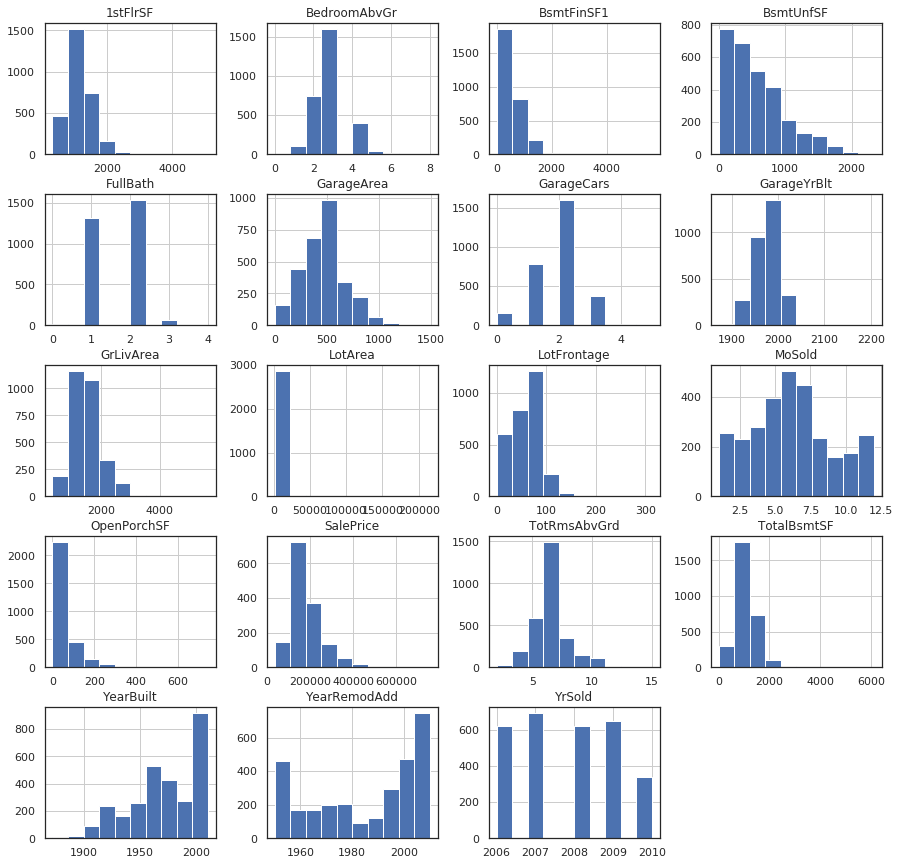

In [323]:
#Plotting variables histogram
fulldf.hist(figsize=(15,15))
plt.show()

* We can notice some assimetric distributions

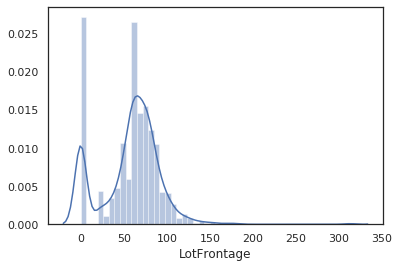

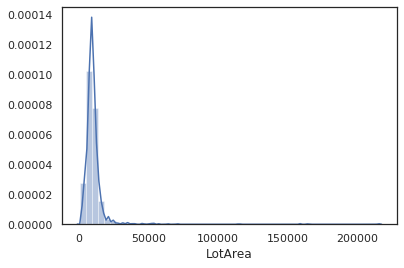

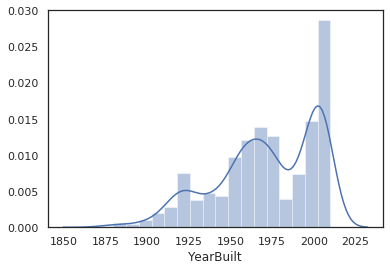

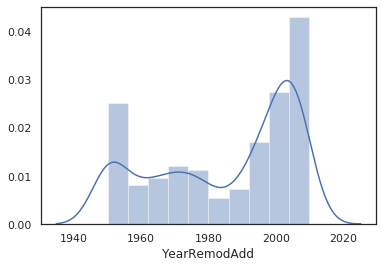

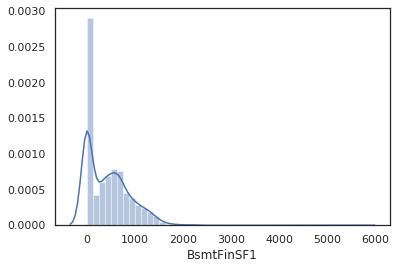

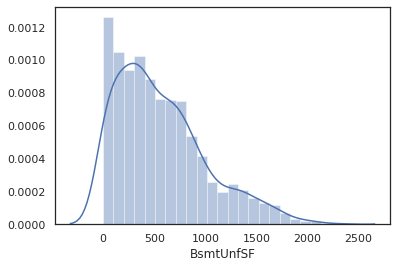

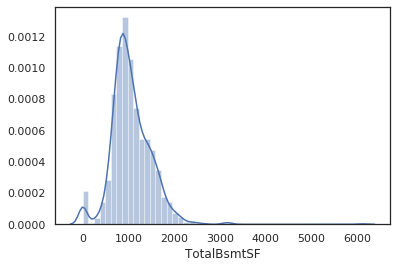

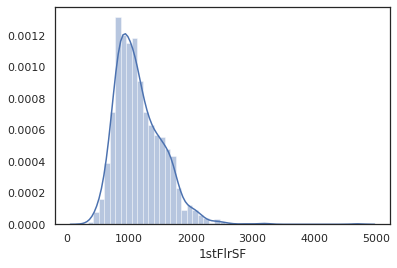

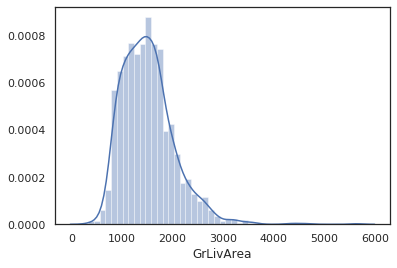

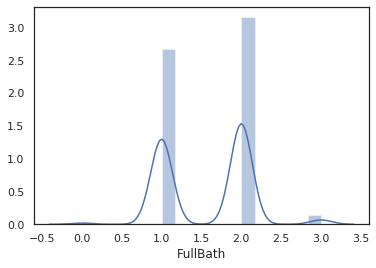

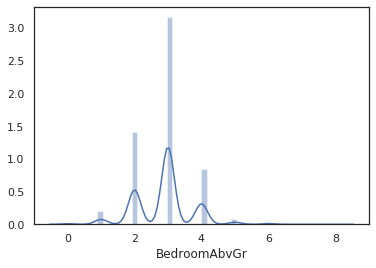

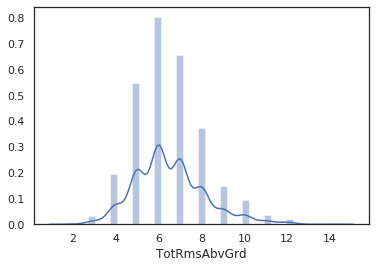

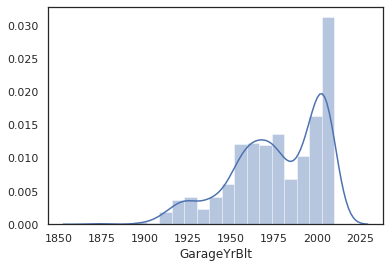

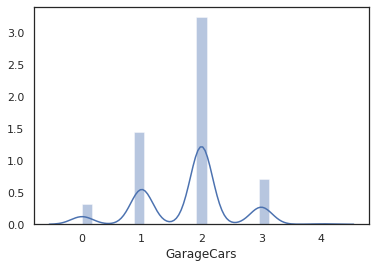

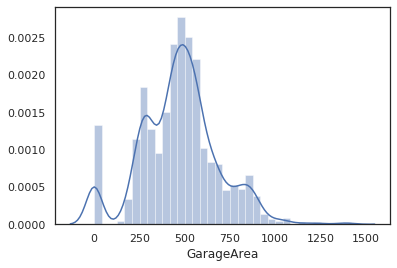

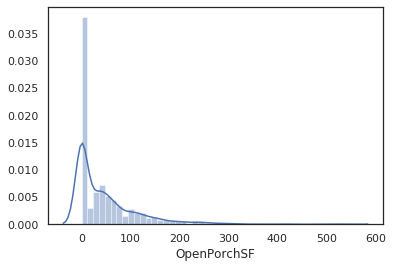

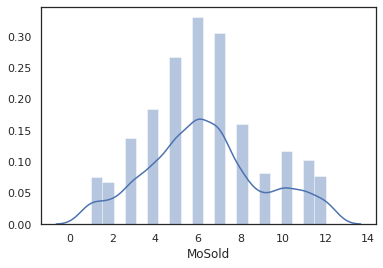

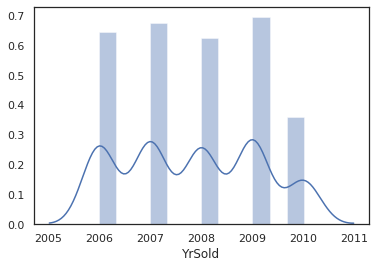

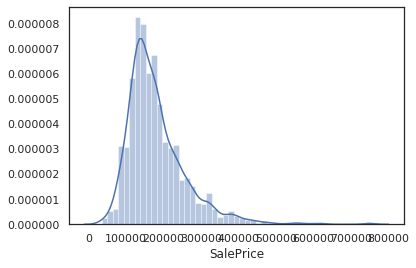

In [324]:
#Checking variables distribution for numerical variables
for graf in nunfeat:
    sns.distplot(trdf[graf])
    plt.show()

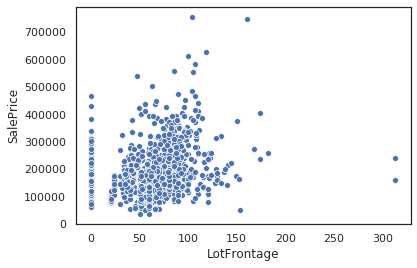

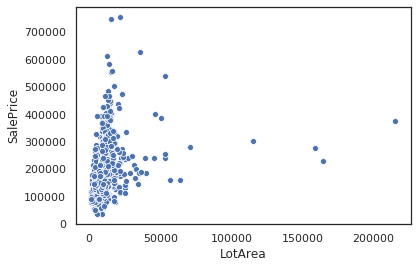

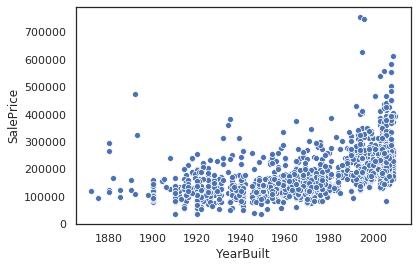

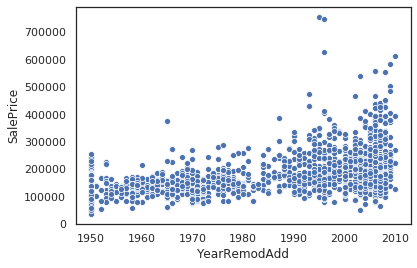

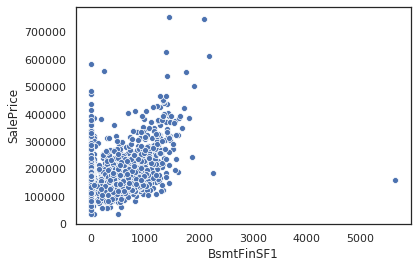

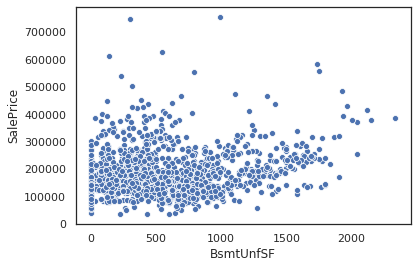

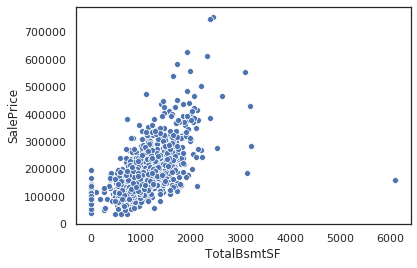

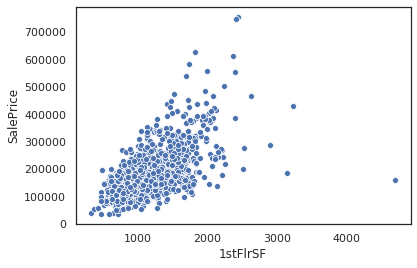

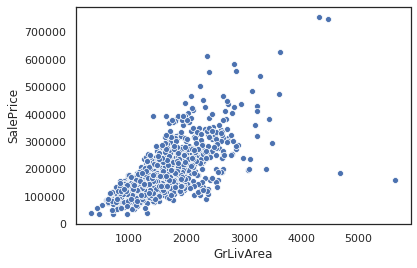

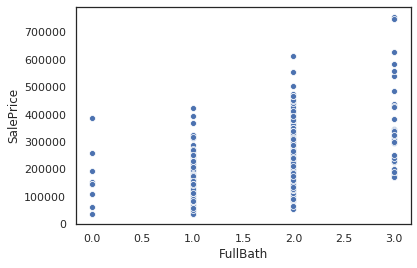

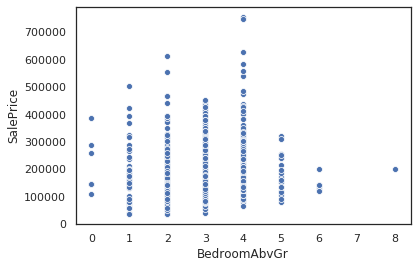

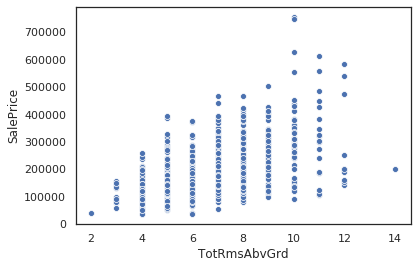

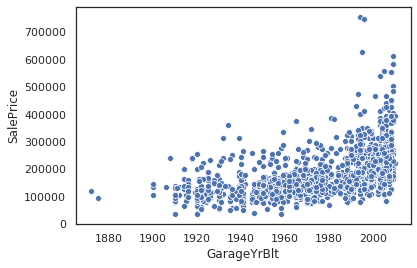

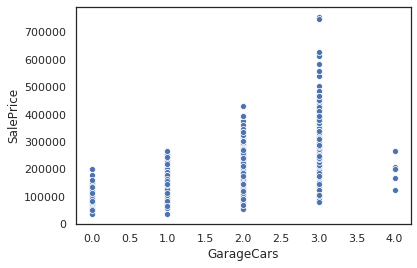

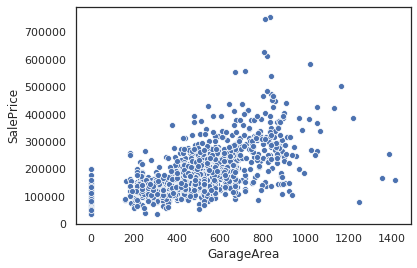

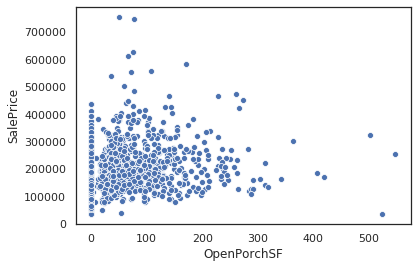

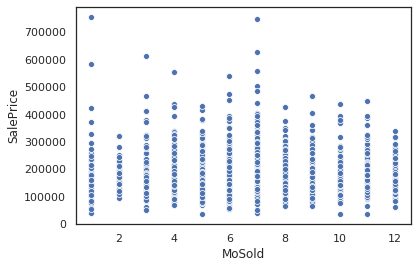

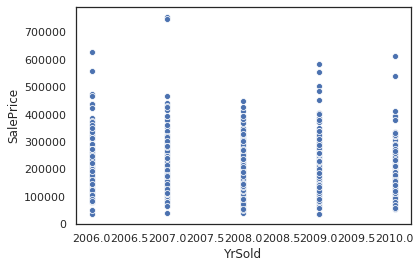

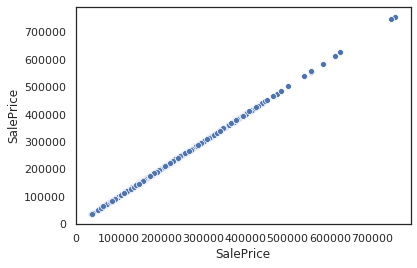

In [325]:
#Checking Scatterplot for numerical data
for graf in nunfeat:
    sns.scatterplot(x=graf, y='SalePrice', data=trdf)
    plt.show()

* We can notice that some variables have correlation and some just don't
* Some of the numerical data has a categorial behaviour

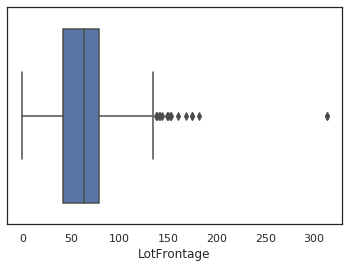

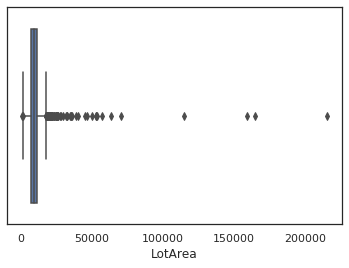

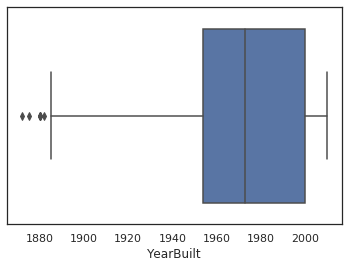

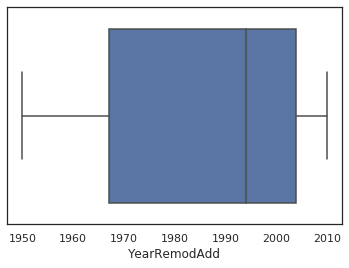

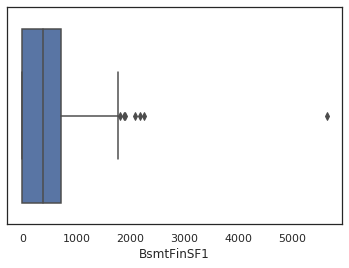

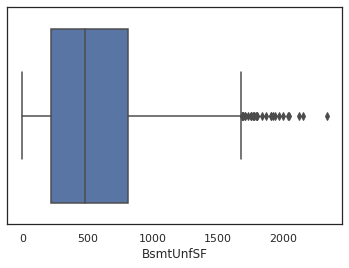

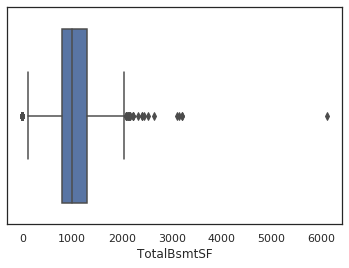

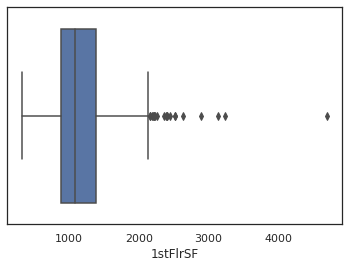

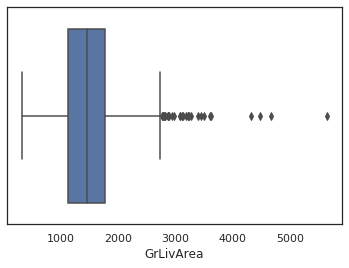

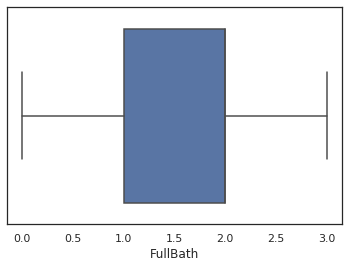

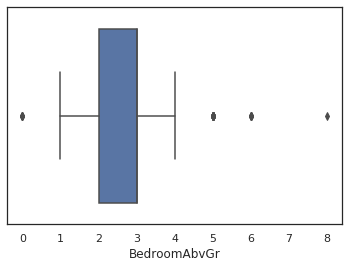

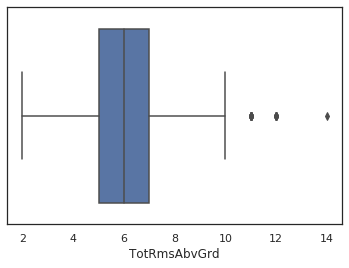

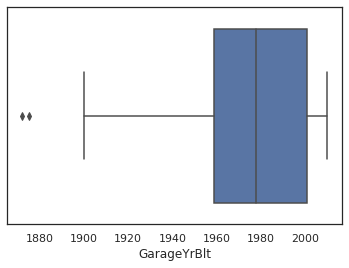

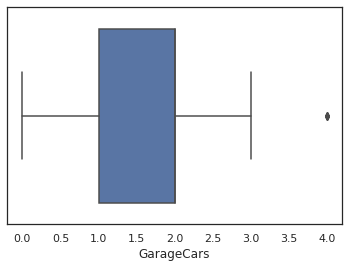

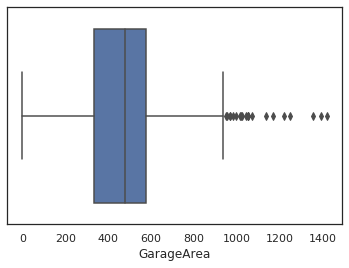

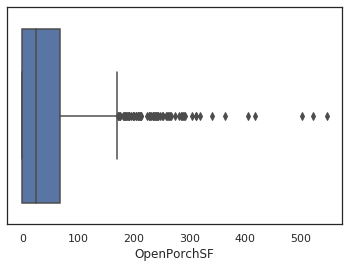

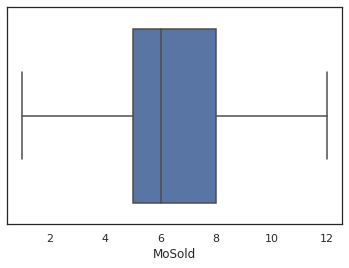

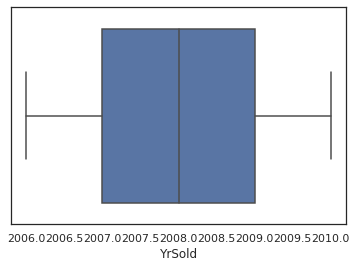

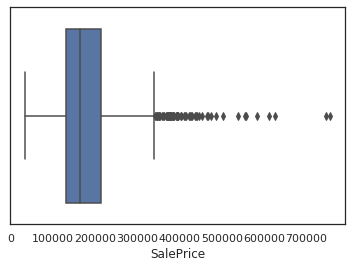

In [326]:
#Checking BoxPlot looking for outliers
for graf in nunfeat:
    sns.boxplot(trdf[graf])
    plt.show()

From this first approach to the data we can indentify:
* Most variables are not in the standard ditribution, most of them are skewed
* Most Variable have Outliers to be handled

In [327]:
#Checking statistical data Categorical Data
fulldf.describe(include='category').T

,count,unique,top,freq
MSSubClass,2919,16,20,1079
MSZoning,2919,5,RL,2269
LotShape,2919,4,Reg,1859
LotConfig,2919,5,Inside,2133
Neighborhood,2919,25,NAmes,443
HouseStyle,2919,8,1Story,1471
OverallQual,2919,10,5,825
OverallCond,2919,9,5,1645
RoofStyle,2919,6,Gable,2310
Exterior1st,2919,15,VinylSd,1026


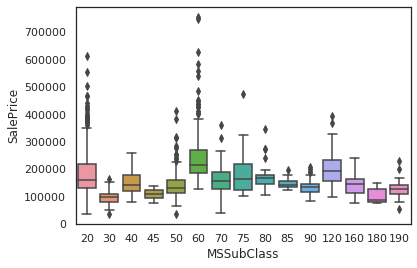

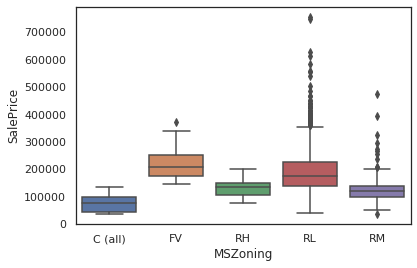

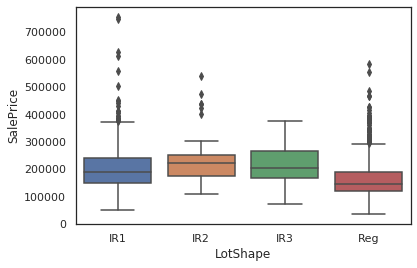

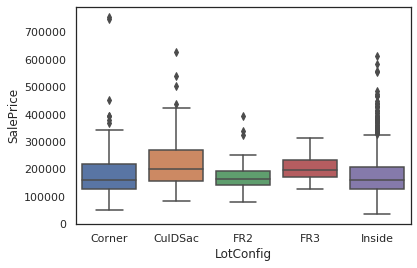

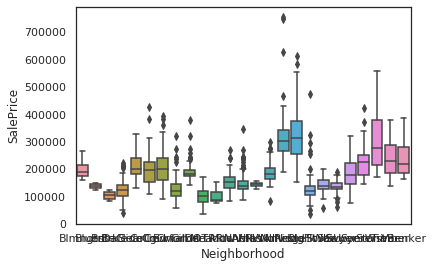

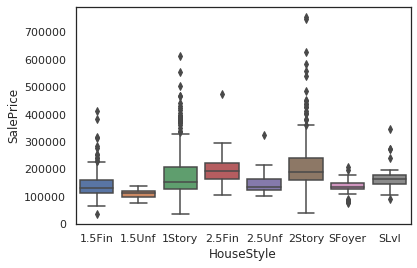

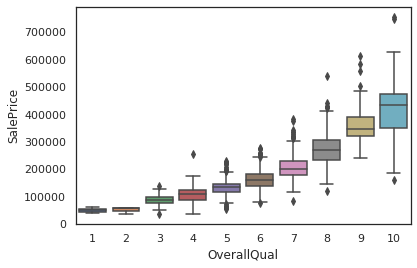

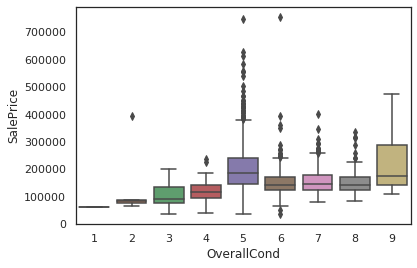

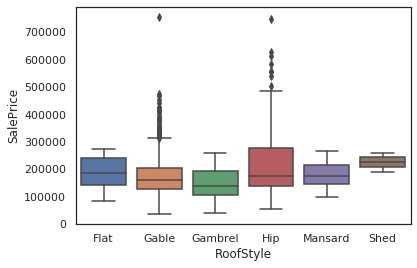

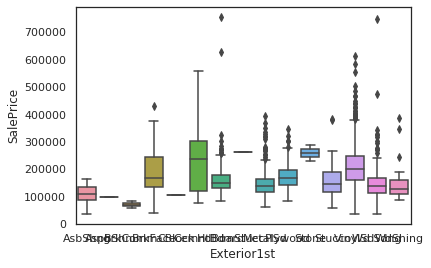

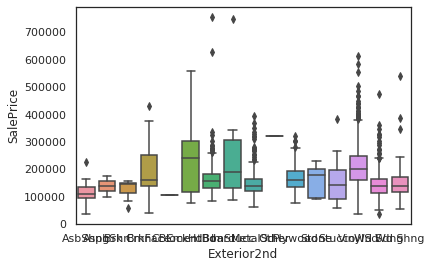

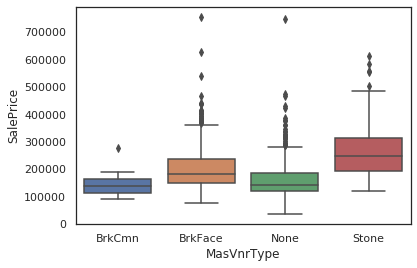

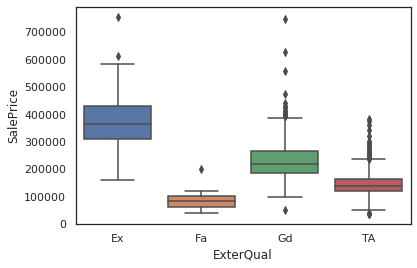

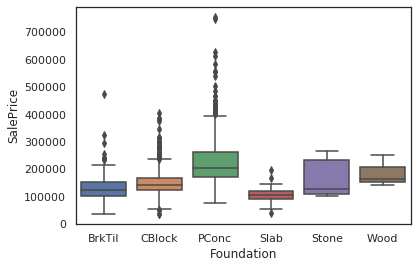

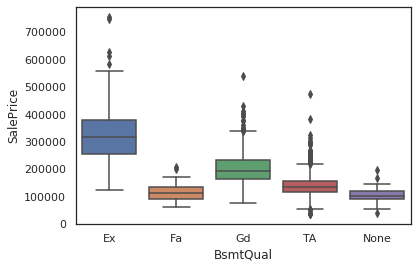

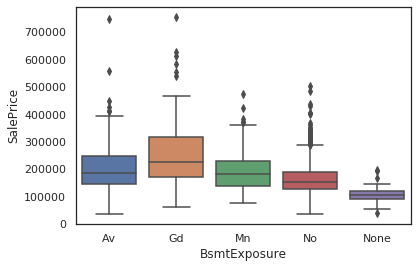

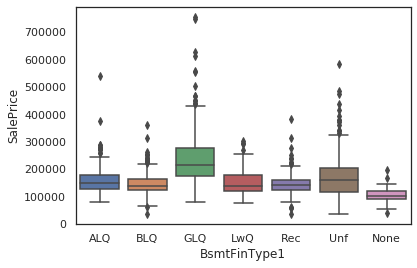

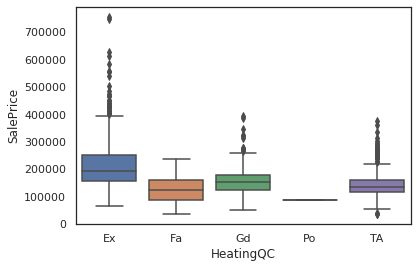

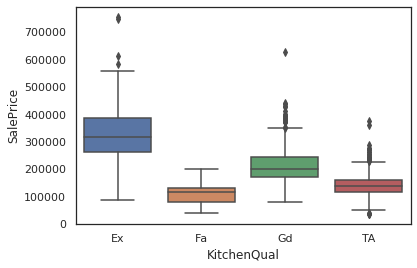

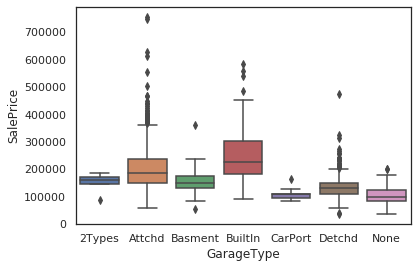

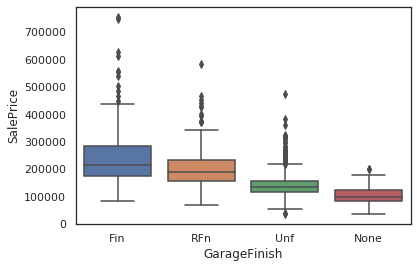

In [328]:
#checking categorial data distribution
for cgraf in catfeat:
    sns.boxplot(trdf[cgraf],trdf['SalePrice'] )
    plt.show()

From all categorical variables the following seems to have the best correlation with salesprice:

* GarageFinish
* BsmtExposure
* OverallQual

**Checking categorical data correlation with Chisquare**

In [329]:
from scipy.stats import chi2_contingency
#Creating a fuction to apply test in the DF
def chisq_func(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))
#
print('************CHISQUARE TEST*****************\n')
pvalues = []
for feat in catfeat:
    print(feat)
    chires = chisq_func(trdf,feat,'SalePrice')
    print(chires[1])
    pvalues.append(chires[1])
chidf = pd.DataFrame(pvalues,index=catfeat,columns=['P-Value'])
chidf.sort_values(by='P-Value')

************CHISQUARE TEST*****************

MSSubClass
0.9928572389696763
MSZoning
4.348325060681923e-11
LotShape
4.724729155980402e-12
LotConfig
0.0458062119580343
Neighborhood
1.3649601026881368e-08
HouseStyle
0.6482615179447816
OverallQual
5.492566057967029e-157
OverallCond
1.6976010710213087e-20
RoofStyle
1.0
Exterior1st
0.9999839433628513
Exterior2nd
0.8469189757654344
MasVnrType
1.5975235795198392e-06
ExterQual
4.25028917158182e-34
Foundation
9.66452199704509e-06
BsmtQual
1.1918698697564916e-29
BsmtExposure
3.4957307744753877e-14
BsmtFinType1
0.21292766404357488
HeatingQC
0.9995946871632676
KitchenQual
1.2820744991685297e-31
GarageType
0.06478066408945313
GarageFinish
2.1293756931636844e-10


,P-Value
OverallQual,5.492566e-157
ExterQual,4.250289e-34
KitchenQual,1.282074e-31
BsmtQual,1.191870e-29
OverallCond,1.697601e-20
BsmtExposure,3.495731e-14
LotShape,4.724729e-12
MSZoning,4.348325e-11
GarageFinish,2.129376e-10
Neighborhood,1.364960e-08


In [330]:
#Checking the only varibles with correlation with SalesPrice
chidf[chidf['P-Value']<0.05]

,P-Value
MSZoning,4.348325e-11
LotShape,4.724729e-12
LotConfig,4.580621e-02
Neighborhood,1.364960e-08
OverallQual,5.492566e-157
OverallCond,1.697601e-20
MasVnrType,1.597524e-06
ExterQual,4.250289e-34
Foundation,9.664522e-06
BsmtQual,1.191870e-29


In [331]:
#Checking the only varibles with NO correlation with SalesPrice
chidf[chidf['P-Value']>0.05]

,P-Value
MSSubClass,0.992857
HouseStyle,0.648262
RoofStyle,1.000000
Exterior1st,0.999984
Exterior2nd,0.846919
BsmtFinType1,0.212928
HeatingQC,0.999595
GarageType,0.064781


# HEEERE

In [332]:
#Dropping variables with no correlation with SalesPrice
droplist = list(chidf[chidf['P-Value']>0.05].index)
trdf.drop(droplist,axis=1,inplace=True)
tsdf.drop(droplist,axis=1,inplace=True)
fulldf.drop(droplist,axis=1,inplace=True)

**Removing outlier data from Train data**

In [333]:
#Removing outliers from Train data
from scipy.stats import zscore
z_scores = zscore(trdf[nunfeat])
abs_z_scores = np.abs(z_scores)
outdroplist = (abs_z_scores > 3)
trdf.drop(trdf[outdroplist].index, inplace = True)

# Checking and Fixing Skewed variable

In [334]:
#We need to concat both Test and Train data otherwise we will have different normalization coeficients
df_final = pd.concat([trdf,tsdf],axis=0)
#Checking overall result and DF Shape
print('Train Shape ', trdf.shape)
print('Test Shape ', tsdf.shape)
print('Full data Shape ', fulldf.shape)
print('CONCAT data Shape ', df_final.shape)

Train Shape  (1353, 32)
Test Shape  (1459, 31)
Full data Shape  (2919, 32)
CONCAT data Shape  (2812, 32)


* We can see that CONCAT data differs from FULL data since we've dropped outliers lines


In [335]:
#finding skewed variables in Train data
skewed_feats = df_final[nunfeat].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_feats

LotArea         2.669299
OpenPorchSF     2.419127
1stFlrSF        1.262400
BsmtFinSF1      0.983029
SalePrice       0.962697
GrLivArea       0.890494
BsmtUnfSF       0.866460
TotRmsAbvGrd    0.629229
TotalBsmtSF     0.560887
BedroomAbvGr    0.223817
MoSold          0.197944
FullBath        0.167535
GarageArea      0.156304
YrSold          0.127666
GarageCars     -0.225202
LotFrontage    -0.364031
GarageYrBlt    -0.415914
YearRemodAdd   -0.435235
YearBuilt      -0.562021
dtype: float64

In [336]:
#We want to sperate the target feature because we need its coeficient latter to convert it back
skewed_feats = skewed_feats.drop('SalePrice')

In [337]:
#Normalizing data using BOXCOX Full data
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skewt = skewed_feats[skewed_feats > 0.5]
skew_index = high_skewt.index

# Normalise skewed features
for i in skew_index:
    boxcox_lambda = boxcox_normmax(df_final[i] + 1)
    print(i, ' LAMBDA: ',boxcox_lambda, '\n' )
    df_final[i] = boxcox1p(df_final[i], boxcox_lambda)

LotArea  LAMBDA:  0.35936457493139573 

OpenPorchSF  LAMBDA:  0.4734576802626378 

1stFlrSF  LAMBDA:  -0.0129087253169447 

BsmtFinSF1  LAMBDA:  0.7133860650982621 

GrLivArea  LAMBDA:  0.11664171300902712 

BsmtUnfSF  LAMBDA:  0.5911876936855783 

TotRmsAbvGrd  LAMBDA:  0.15391249590195447 

TotalBsmtSF  LAMBDA:  0.9088605692431073 



/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [338]:
#Normalizing tagert feature
sales_boxcox_lambda = boxcox_normmax(trdf['SalePrice'] + 1)
print( ' SalesPrice LAMBDA: ',sales_boxcox_lambda, '\n' )
trdf['SalePrice'] = boxcox1p(trdf['SalePrice'], sales_boxcox_lambda)

 SalesPrice LAMBDA:  0.13180595076201088 



# **Checking Numerical data Again, seems much better**

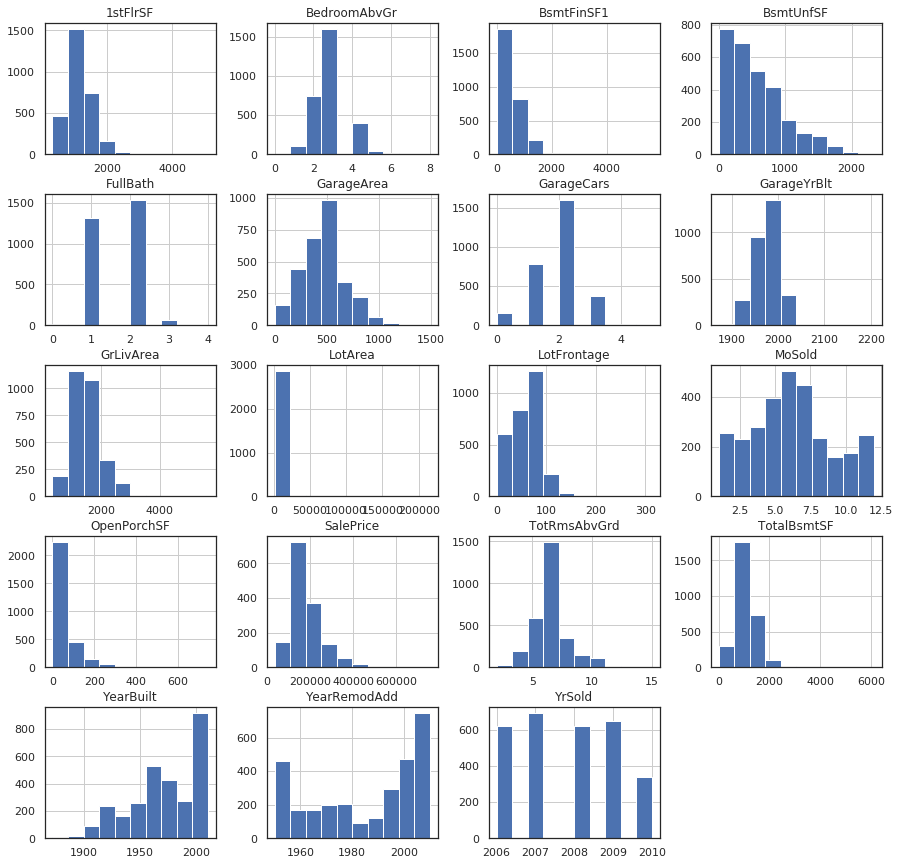

In [339]:
#Plotting variables histogram
fulldf.hist(figsize=(15,15))
plt.show()

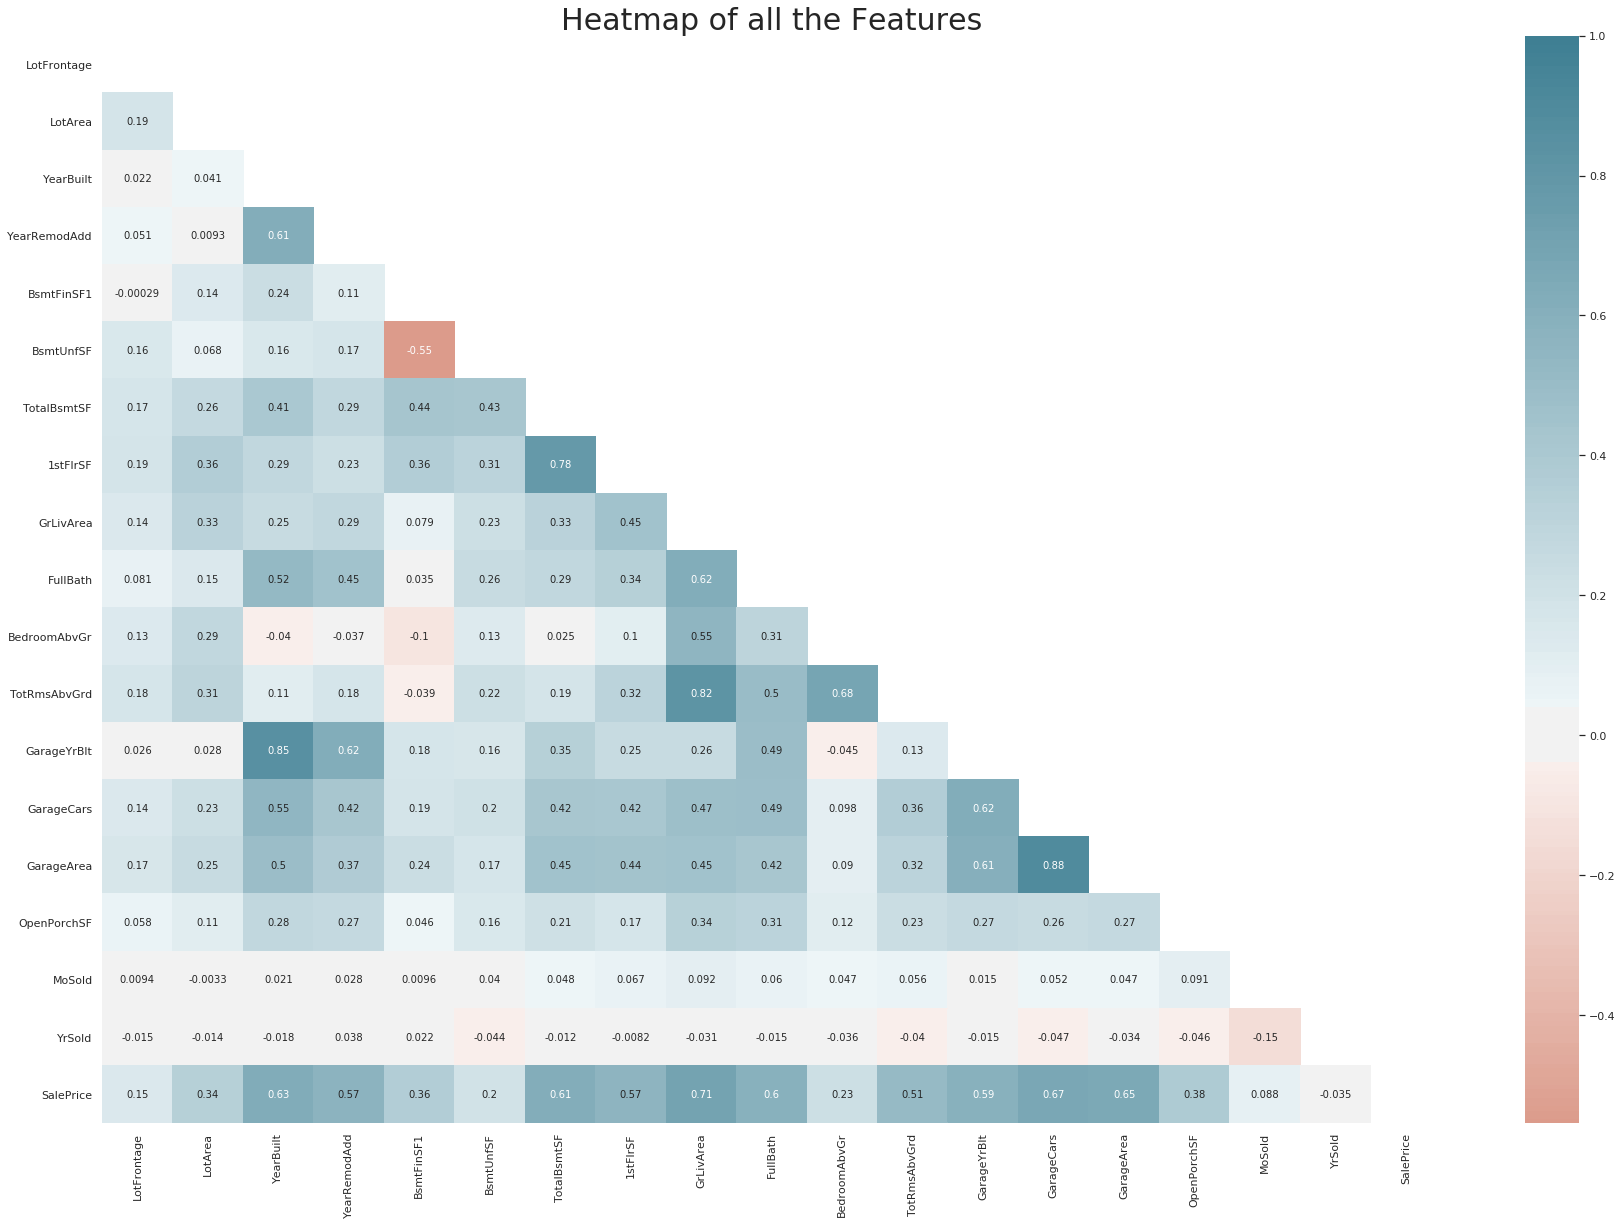

In [340]:
## Plot fig sizing. 
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(trdf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(trdf.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
plt.title("Heatmap of all the Features", fontsize = 30);

* None of the remaning non-targer features have more them 90% correlation, se we decided not combining variables

# Creating Hot Encoding value for categorical data

In [341]:
#With combined DF we create the dummie columns
df_final_dummie = pd.get_dummies(df_final).reset_index(drop=True)
#Them we can split data again using the number of lines from the df
line_count = trdf.shape[0]
trdf_dummie = df_final_dummie[:line_count]
tsdf_dummie = df_final_dummie[line_count:]

#Checking overall result and DF Shape
print('Train Shape ', trdf.shape)
print('Test Shape ', tsdf.shape)
print('Dummie Train Shape ', trdf_dummie.shape)
print('Dummie Test Shape ', tsdf_dummie.shape)

Train Shape  (1353, 32)
Test Shape  (1459, 31)
Dummie Train Shape  (1353, 109)
Dummie Test Shape  (1459, 109)


# Applying ML

In [342]:
#Spliting X data from Y data
# Seleção de variáveis preditoras (Feature Selection)
atributos2 = list(trdf_dummie.columns)
atributos2.remove('SalePrice')
# Selection the target feature
atrib_prev2 = ['SalePrice']
# Creating objetcs for ML
X2 = trdf_dummie[atributos2].values
Y2 = trdf[atrib_prev2].values
# Defininng the splitting rate
split_test_size = 0.30
# Creating test and train objects
from sklearn.model_selection import train_test_split
X2_treino, X2_teste, Y2_treino, Y2_teste = train_test_split(X2, Y2, test_size = split_test_size, random_state = 42)

#Printing out the Test and Train frames information
print("\n******************************************************************************")
print("Imprimindo os dados de treino e teste")
print("{0:0.2f}% nos dados de treino".format((len(X2_treino)/len(trdf_dummie.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X2_teste)/len(trdf_dummie.index)) * 100))
print("******************************************************************************\n")


# LINEAR REGRESSION ALGORITHM
print("\n******************************************************************************")
print("Utilizando um classificador Regressao Linear")
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
# Criando o modelo preditivo
modelo_v3 = linear_model.LinearRegression()
modelo_v3.fit(X2_treino, Y2_treino.ravel())
# Verificando os dados de treino
modelo_v3_train = modelo_v3.predict(X2_treino)
print('R2 TREINO Regressao Linear score: %.2f' % r2_score(Y2_treino, modelo_v3_train))
print('Mean Regressao Linear score: %.2f' % mean_squared_error(Y2_treino, modelo_v3_train))
# Verificando nos dados de teste
modelo_v3_test = modelo_v3.predict(X2_teste)
print('\nR2 TESTE Regressao Linear score: %.2f' % r2_score(Y2_teste, modelo_v3_test))
print('Mean TESTE Regressao Linear score: %.2f' % mean_squared_error(Y2_teste, modelo_v3_test))
print("******************************************************************************\n")

#LASSO, RIDGE & ELASTIC ALGORITHMS
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

# Kernel Ridge Regression
print("\n******************************************************************************")
print("Utilizando Ridge Regression")
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
ridge_model = ridge.fit(X2_treino, Y2_treino)
ridge_pred = ridge_model.predict(X2_teste)
print('R2 Ridge Regression %.2f' % r2_score(Y2_teste, ridge_pred))
print('Mean Ridge Regressions: %.2f' % mean_squared_error(Y2_teste, ridge_pred))
print("******************************************************************************\n")

# LASSO Regression
print("\n******************************************************************************")
print("Utilizando LASSO Regression")
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7,alphas=alphas2,random_state=42, cv=kfolds))
lasso_model = lasso.fit(X2_treino, Y2_treino)
lasso_pred = lasso_model.predict(X2_teste)
print('R2 LASSO Regression %.2f' % r2_score(Y2_teste, lasso_pred))
print('Mean LASSO Regression: %.2f' % mean_squared_error(Y2_teste, lasso_pred))
print("******************************************************************************\n")

# Elastic Net Regression
print("\n******************************************************************************")
print("Utilizando Elastic Net Regression")
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7,alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))
elastic_model = elasticnet.fit(X2_treino, Y2_treino)
el_pred = elasticnet.predict(X2_teste)
print('R2 Elastic Net Regression %.2f' % r2_score(Y2_teste, el_pred))
print('Mean Elastic Net Regression: %.2f' % mean_squared_error(Y2_teste, el_pred))
print("******************************************************************************\n")


******************************************************************************
Imprimindo os dados de treino e teste
69.99% nos dados de treino
30.01% nos dados de teste
******************************************************************************


******************************************************************************
Utilizando um classificador Regressao Linear
R2 TREINO Regressao Linear score: 0.93
Mean Regressao Linear score: 0.23

R2 TESTE Regressao Linear score: 0.89
Mean TESTE Regressao Linear score: 0.32
******************************************************************************


******************************************************************************
Utilizando Ridge Regression
R2 Ridge Regression 0.89
Mean Ridge Regressions: 0.34
******************************************************************************


******************************************************************************
Utilizando LASSO Regression
R2 LASSO Regression 0.89
Mean LASSO Regres

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Elastic Net Regression 0.89
Mean Elastic Net Regression: 0.33
******************************************************************************



# Applying our model to real data

In [343]:
#Creating the imput data with real data
X_tsdf_dummie=tsdf_dummie[atributos2].values

# LINEAR REGRESSION ALGORITHM
Y_linear = modelo_v3.predict(X_tsdf_dummie)
# RIDGE REGRESSION ALGORITHM
Y_ridge = ridge_model.predict(X_tsdf_dummie)
# LASSO REGRESSION ALGORITHM
Y_lasso = lasso_model.predict(X_tsdf_dummie)
# ELASTICNET REGRESSION ALGORITHM
Y_elasticnet = elasticnet.predict(X_tsdf_dummie)

#Creating a dataframe with all the 4 predicitons
tsdf2=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
#Dropping unecessary columns
drdp = list(tsdf2.columns)
tsdf2.drop(drdp[1:],axis=1,inplace = True)
tsdf2['Linear_Predict']=Y_linear
tsdf2['Ridge_Predict']=Y_ridge
tsdf2['Lasso_Predict']=Y_lasso
tsdf2['Elastic_Predict']=Y_elasticnet

#Reverting the normalization
from scipy.special import boxcox, inv_boxcox
tsdf2['Linear_Predict']=inv_boxcox(tsdf2['Linear_Predict'], sales_boxcox_lambda)
tsdf2['Ridge_Predict']=inv_boxcox(tsdf2['Ridge_Predict'], sales_boxcox_lambda)
tsdf2['Lasso_Predict']=inv_boxcox(tsdf2['Lasso_Predict'], sales_boxcox_lambda)
tsdf2['Elastic_Predict']=inv_boxcox(tsdf2['Elastic_Predict'], sales_boxcox_lambda)

#Creating a column with the mean value of the algorithms
tsdf2['SalePrice']=(tsdf2['Linear_Predict'].values+tsdf2['Ridge_Predict'].values\
                       +tsdf2['Lasso_Predict'].values+tsdf2['Elastic_Predict'].values)/4

tsdf2.sort_values(by='Id')

,Id,Linear_Predict,Ridge_Predict,Lasso_Predict,Elastic_Predict,SalePrice
0,1461,120987.002699,118899.622376,121584.251835,121459.075002,120732.487978
1,1462,164629.047916,165325.874378,164597.583621,164546.998945,164774.876215
2,1463,185592.881418,186380.610396,186443.207873,186278.941028,186173.910179
3,1464,196562.425955,197232.289709,196898.809056,196857.272590,196887.699327
4,1465,199748.190713,190333.545377,198369.662946,198541.505019,196748.226014
...,...,...,...,...,...,...
1454,2915,88684.976670,89833.897777,90005.424289,89784.149985,89577.112180
1455,2916,89730.468937,94237.023008,90989.122786,90780.880860,91434.373898
1456,2917,173754.824899,176905.695286,173562.622284,173508.674486,174432.954239
1457,2918,120292.909980,121312.004746,120281.350811,120217.562964,120525.957125


# Creating the submission file

In [344]:
subdf = tsdf2.drop(['Linear_Predict','Ridge_Predict','Lasso_Predict','Elastic_Predict'],axis=1)
subdf

,Id,SalePrice
0,1461,120732.487978
1,1462,164774.876215
2,1463,186173.910179
3,1464,196887.699327
4,1465,196748.226014
...,...,...
1454,2915,89577.112180
1455,2916,91434.373898
1456,2917,174432.954239
1457,2918,120525.957125


In [346]:
#Exporting the submissionn file
subdf.to_csv("/kaggle/working/submission_file.csv", header=True, index = False)